<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/GSS_Isabella's_Part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 62 (delta 7), reused 2 (delta 2), pack-reused 52
Receiving objects: 100% (62/62), 24.47 MiB | 13.17 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./project_gss17/gss_data_v2.csv')

In [4]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk
0,1994,4,married,32.0,22004.0,3.0,NaN
1,1994,5,never married,20.0,NaN,0.0,neither agree nor disagree
2,1994,6,never married,20.0,13203.0,0.0,disagree
3,1994,7,widowed,35.0,27872.0,4.0,NaN
4,1994,8,never married,45.0,13203.0,1.0,strongly agree


In [15]:
meovrwrk = df['meovrwrk']
meovrwrk = meovrwrk.astype("string") # cast to string
print(meovrwrk.unique())
print(meovrwrk.dtype)

<StringArray>
[                        <NA>, 'neither agree nor disagree',
                   'disagree',             'strongly agree',
                      'agree',          'strongly disagree']
Length: 6, dtype: string
string


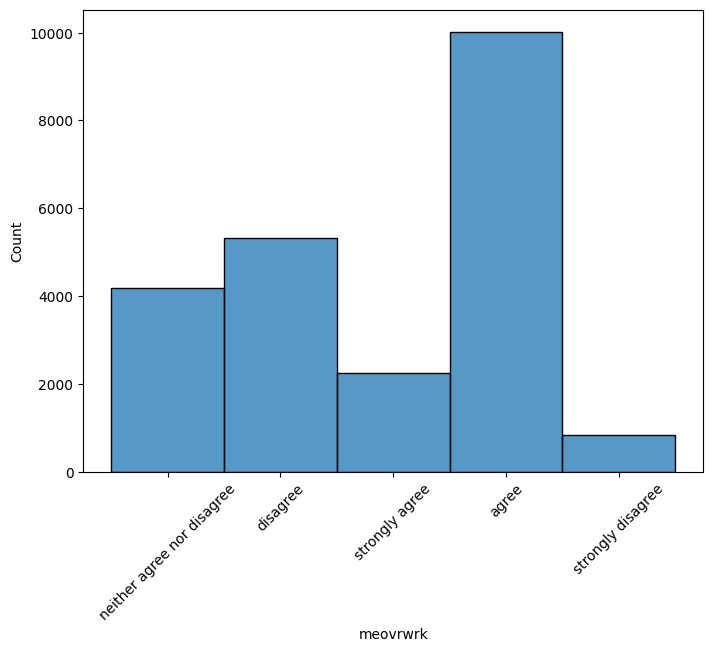

In [19]:
plt.figure(figsize = (8,6))
sns.histplot(meovrwrk)
plt.xticks(rotation=45)
plt.show()

In [21]:
# assign cleaned data to original df
df['meovrwrk'] = meovrwrk

In [22]:
df.head()

,year,id,marital,hrs1,conrinc,childs,meovrwrk
0,1994,4,married,32.0,22004.0,3.0,<NA>
1,1994,5,never married,20.0,NaN,0.0,neither agree nor disagree
2,1994,6,never married,20.0,13203.0,0.0,disagree
3,1994,7,widowed,35.0,27872.0,4.0,<NA>
4,1994,8,never married,45.0,13203.0,1.0,strongly agree


In [24]:
# extract marital next
marital = df['marital']
print(marital.dtype)

object


In [26]:
# cast to string
marital = marital.astype("string")
print(marital.unique())

<StringArray>
['married', 'never married', 'widowed', 'divorced', 'separated', <NA>]
Length: 6, dtype: string


In [27]:
df['marital'] = marital

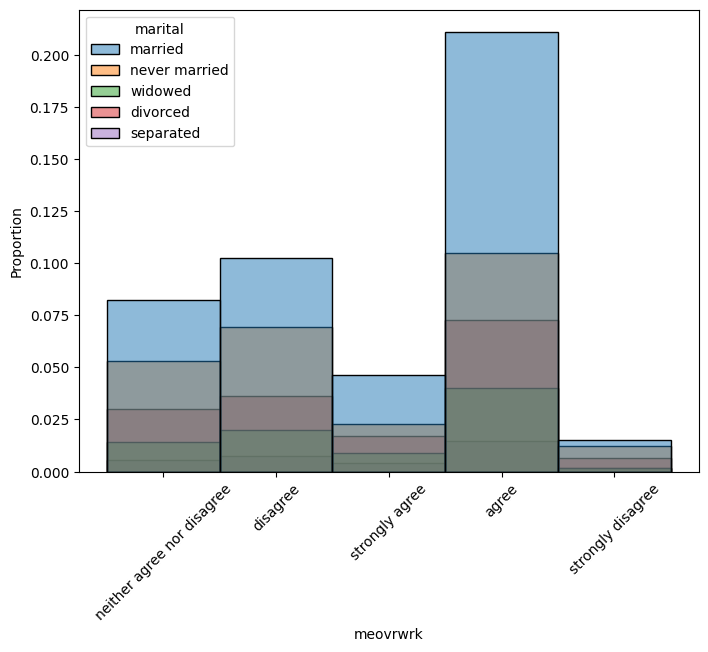

In [33]:
## create grouped histplot
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=meovrwrk,hue=marital,stat='proportion')
plt.xticks(rotation=45)
plt.show()

In [37]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True)

meovrwrk,agree,disagree,neither agree nor disagree,strongly agree,strongly disagree,All
marital,,,,,,
divorced,1638,815,680,390,144,3667
married,4769,2319,1859,1046,344,10337
never married,2370,1572,1195,514,275,5926
separated,334,165,123,92,36,750
widowed,906,446,318,198,39,1907
All,10017,5317,4175,2240,838,22587


In [38]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize=True)

meovrwrk,agree,disagree,neither agree nor disagree,strongly agree,strongly disagree,All
marital,,,,,,
divorced,0.072520,0.036083,0.030106,0.017267,0.006375,0.162350
married,0.211139,0.102670,0.082304,0.046310,0.015230,0.457653
never married,0.104928,0.069598,0.052907,0.022756,0.012175,0.262363
separated,0.014787,0.007305,0.005446,0.004073,0.001594,0.033205
widowed,0.040112,0.019746,0.014079,0.008766,0.001727,0.084429
All,0.443485,0.235401,0.184841,0.099172,0.037101,1.000000


see if we have enough data for like 2022 only

In [41]:
df2022=df.where(df['year']==2022)

In [43]:
df2022.describe()

,year,id,hrs1,conrinc,childs
count,3544.0,3544.000000,1938.000000,1990.000000,3533.000000
mean,2022.0,1772.535553,40.181631,42142.819586,1.737617
std,0.0,1023.268418,14.107341,40274.114699,1.669947
min,2022.0,1.000000,0.000000,336.000000,0.000000
25%,2022.0,886.750000,37.000000,14280.000000,0.000000
50%,2022.0,1772.500000,40.000000,30240.000000,2.000000
75%,2022.0,2658.250000,45.000000,55440.000000,3.000000
max,2022.0,3545.000000,89.000000,170912.582400,8.000000


In [44]:
df2022

,year,id,marital,hrs1,conrinc,childs,meovrwrk
0,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
1,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
2,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
3,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
4,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...
42994,2022.0,3541.0,never married,48.0,NaN,0.0,neither agree nor disagree
42995,2022.0,3542.0,married,50.0,45360.0,2.0,neither agree nor disagree
42996,2022.0,3543.0,never married,38.0,55440.0,1.0,disagree
42997,2022.0,3544.0,married,40.0,45360.0,0.0,<NA>
